## Sentiment Analysis using Neural Networks

This Project focuses on implementing a basic form of Natural Language Processing (NLP) known as Sentiment Analysis. The objective is to develop two distinct neural networks using Keras to classify book reviews as either positive or negative.

The challenge lies in accurately identifying the sentiment of a review, even when the sentiment is negated or nuanced. For instance, consider the example review: "This book is not very good." Although the phrase "very good" appears at the end, indicating a positive sentiment, the presence of the negation term "not" reverses the sentiment, making it negative. Our task is to train the neural networks to recognize and classify such nuanced distinctions effectively.

To accomplish this, the project can be divided into the following key steps:

1. **Get and explore dataset**: Obtain a suitable dataset consisting of book reviews for training and evaluation purposes.

2. **Preprocess the Data**: Prepare the dataset by applying necessary preprocessing techniques such as tokenization, normalization, and removing stopwords.

3. **Build the Model**: Construct two different neural network architectures using the Keras framework, each with its unique configuration.

4. **Train the Model**: Train the neural networks using the preprocessed dataset to learn the patterns and sentiments associated with the book reviews.

5. **Test the Model**: Evaluate the performance of the trained models by testing them on a separate set of book reviews.

6. **Make Predictions**: Utilize the trained models to predict sentiments for new, unseen book reviews and assess their accuracy.

By following these steps, we aim to develop a robust sentiment analysis system capable of accurately classifying book reviews as positive or negative. The project allows for a comparative analysis of the two neural network models, providing insights into their respective performances.

Please refer to the project documentation and code for detailed instructions on dataset acquisition, data preprocessing, model building, training, testing, and making predictions.

# Get and explore dataset

In [2]:
# Importing the necessary libraries and modules
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import re
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

In [3]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [4]:
# Defining the file paths for negative and positive files
negative_file = "negative.txt"
positive_file = "positive.txt"

In [5]:
#helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [6]:
# Loading data from the positive and negative files
positive = load_data(positive_file)
negative = load_data(negative_file)

# Printing the first 10 elements from the positive and negative data
print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [7]:
# Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
from tensorflow.keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))

In [8]:
# Investigate the dataset. 
# Counting the number of non-empty lines in the negative data
count = 0
for line in negative:
    if line != "/n":
        count += 1

# Counting the number of non-empty lines in the positive data
count1 = 0
for lines in positive:
    if lines != "/n":
        count1 += 1

# Printing the total number of negative reviews, positive reviews, and all reviews
print("Total number of negative reviews:", count)
print("Total number of positive reviews:", count1)
print("Total number of reviews:", count + count1)


Total number of negative reviews 921
Total number of positive reviews 872
Total number of reviews 1793


Mean = 30.965
Standard Deviation = 17.016567126726507 


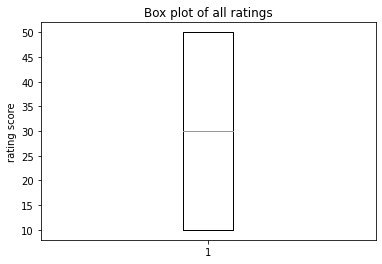

In [9]:
# Calculate and report the mean review size, its standard deviation and create a boxplot.

def load_data_rating(filename):
    # Opening the file in read mode
    thefile = open(filename, 'r') 

    # Reading all lines from the file
    lines = thefile.readlines() 

    # Initializing an empty list to store the ratings
    rating = []

    # Looping through each line in the file
    for l in range(0, len(lines)):
        # Checking if the current line is "<rating>"
        if lines[l - 1].strip() == "<rating>":
            # Extracting the rating value and filtering out unnecessary words
            theline = filter_words(lines[l])
            if len(theline) < 50:
                rating.append(theline)

    # Returning the list of ratings
    return rating

# Loading ratings from the positive and negative files
positive_rating = load_data_rating(positive_file)
negative_rating = load_data_rating(negative_file)

# Combining the positive and negative ratings into a single list
rating = positive_rating + negative_rating

# Converting each rating to an integer
for i in range(0, len(rating)):
    rating[i] = int(rating[i])

# Importing the statistics module for further analysis
import statistics

# Calculating the mean and standard deviation of the ratings
mean = statistics.mean(rating)
std_dev = statistics.stdev(rating)

# Printing the calculated mean and standard deviation
print("Mean =", mean)
print("Standard Deviation =", std_dev)

# Creating a box plot to visualize the distribution of ratings
plt.boxplot(rating)
plt.title("Box plot of all ratings")
plt.ylabel("Rating score")
plt.xlabel("")
plt.show()

In [10]:
# Calculate the number of unique words in the dataset

# split the sentences into a list
data1 = " ".join(data).split(" ")

# get all the unique words
unique_words=[]
for i in data1:
     if data1.count(i)==1:
         if i not in unique_words:
             unique_words.append(i)
 
# calculate length of unique words
len(unique_words)

1730

In [11]:
# Perform any other dataset investigation that you feel would be valuable

# Printing the number of words in the reviews
print("There are", len(data1), "words in the reviews")

# Calculating the number of duplicate words
duplicate = len(data1) - len(unique_words)
print("There are", duplicate, "duplicate words")

There are 7776 words in the reviews
There are 6046 duplicate words


In [12]:
# Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

# Creating a Tokenizer object with a specified maximum number of words
tokenizer = Tokenizer(num_words=25)

# Creating the vocabulary by fitting the Tokenizer on the data
tokenizer.fit_on_texts(data)

# Tokenizing the data using the created vocabulary
tokenized_data = tokenizer.texts_to_sequences(data)

# Calculating the vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Comparing a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]


# Preprocess the Data

In [138]:
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# Padding the sequences using pad_sequences
padded_sentences = pad_sequences(data, maxlen=4, padding="post")

# Displaying the padded sentences
print(padded_sentences)

array([[  2,  19, 492, 493],
       [830,   4,   2, 831],
       [131,   0,   0,   0],
       ...,
       [ 86,   0,   0,   0],
       [  6, 226,   0,   0],
       [ 45,  52,   0,   0]])

# Build the Model

In [137]:
# Creating the x and y data for the train-test set
pos = []
for i in range(len(positive)):
    pos.append([1, 0])
pos = np.array(pos)

neg = []
for i in range(len(negative)):
    neg.append([0, 1])
neg = np.array(neg)

combine = (pos, neg)

# Creating the y_data by concatenating the positive and negative labels
y_data = np.concatenate(combine)

# Creating the X_data by padding the tokenized data with a maximum length of 1680
X_data = pad_sequences(tokenized_data, maxlen=1680, padding="post")

In [298]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=0, shuffle=True)

# Printing the shape of the training and testing data
print("X_train shape =", X_train.shape)
print("Y_train shape =", y_train.shape)

X_train shape = (1434, 1680)
Y_train shape = (1434, 2)


Making a prediction for the test set given the model
Create reports for precision, recall and f1 score. Also print the confusion matrix. 

In [302]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def assess_model(model, X_test, y_test):
    # Predicting labels for the test data
    y_pred = model.predict(X_test)
    
    # Converting the predicted probabilities to class labels
    y_pred = to_class(y_pred)
    y_test = to_class(y_test)
    
    return y_pred, y_test

# Assessing the model's performance
y_pred, y_test = assess_model(model, X_test, y_test)

# Calculating precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
print('Precision score: %f' % precision)

recall = recall_score(y_test, y_pred)
print('Recall score: %f' % recall)

f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

print("\n")

# Calculating and displaying the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

precision score: 0.504178
recall score: 1.000000
F1 score: 0.670370




array([[  0, 178],
       [  0, 181]], dtype=int64)

# Network architecture

Network architecturethe way in which a deep learning model is structured and more importantly what it’s designed to do, it can be used to determine The model’s accuracy, what the model can predict, what the model expects as input and output and the combination of layers and how data flows through the layers.

# Train the Model

In [328]:
# Build a neural network model
import tensorflow
from tensorflow import keras

from keras.layers.embeddings import Embedding 
from tensorflow.keras import layers

output_dim = 16

# Create a sequential model
model = keras.Sequential()

# Add an embedding layer
model.add(Embedding(vocab_size, output_dim))

# Add a dropout layer
model.add(layers.Dropout(0.3))

# Add a batch normalization layer
model.add(layers.BatchNormalization())

# Add an LSTM layer
model.add(layers.LSTM(32))

# Add a dense layer with softmax activation
model.add(layers.Dense(2, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, None, 16)          40960     
                                                                 
 dropout_14 (Dropout)        (None, None, 16)          0         
                                                                 
 batch_normalization_13 (Bat  (None, None, 16)         64        
 chNormalization)                                                
                                                                 
 lstm_11 (LSTM)              (None, 32)                6272      
                                                                 
 dense_10 (Dense)            (None, 2)                 66        
                                                                 
Total params: 47,362
Trainable params: 47,330
Non-trainable params: 32
________________________________________________

In [329]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Test the Model

Examine performance of model

In [327]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=10)
history

Epoch 1/5
144/144 [==============================] - 104s 724ms/step - loss: 0.6932 - accuracy: 0.5056
Epoch 2/5
144/144 [==============================] - 106s 734ms/step - loss: 0.6941 - accuracy: 0.5049
Epoch 3/5
144/144 [==============================] - 107s 745ms/step - loss: 0.6935 - accuracy: 0.5153
Epoch 4/5
144/144 [==============================] - 104s 725ms/step - loss: 0.6925 - accuracy: 0.5202
Epoch 5/5
144/144 [==============================] - 111s 772ms/step - loss: 0.6932 - accuracy: 0.5132


Plot graphs for accuracy and loss

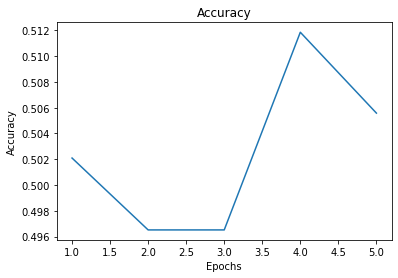

In [323]:
# Plotting the training accuracy over epochs
acc = history.history['accuracy']
epochs = range(1, 6)
plt.plot(epochs, acc)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plotting the training loss over epochs
loss = history.history['loss']
epochs = range(1, 6)
plt.plot(epochs, loss)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Make a prediction

In [340]:
# This is a very small set of completed new data to use to make predictions.
# all coments will be negetive
prediction_data = ["this book is awful", "i hated this book", "the worst", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = pad_sequences(tokenized, padding='post', maxlen=4)

# Make predictions using the model
predictions = model.predict(padded)

# Convert predictions to word labels using the "to_word_label" helper function
predictions = to_word_label(predictions)

# Print the predicted labels
# preditions should all be negetive
predictions


['negative', 'negative', 'negative', 'negative', 'negative']